## Calculating the Return of Indices

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Consider three famous American market indices – Dow Jones, S&P 500, and the Nasdaq for the period of 1st of January 2000 until today.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['^DJI', '^GSPC', '^IXIC']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='2000-1-1')['Adj Close']

In [3]:
ind_data.head()

,^DJI,^GSPC,^IXIC
Date,,,
1999-12-31,11497.120117,1469.250000,4069.310059
2000-01-03,11357.509766,1455.219971,4131.149902
2000-01-04,10997.929688,1399.420044,3901.689941
2000-01-05,11122.650391,1402.109985,3877.540039
2000-01-06,11253.259766,1403.449951,3727.129883


In [4]:
ind_data.tail()

,^DJI,^GSPC,^IXIC
Date,,,
2021-10-18,35258.609375,4486.459961,15021.809570
2021-10-19,35457.308594,4519.629883,15129.089844
2021-10-20,35609.339844,4536.189941,15121.679688
2021-10-21,35603.078125,4549.779785,15215.700195
2021-10-22,35677.019531,4544.899902,15090.200195


Normalize the data to 100 and plot the results on a graph. 

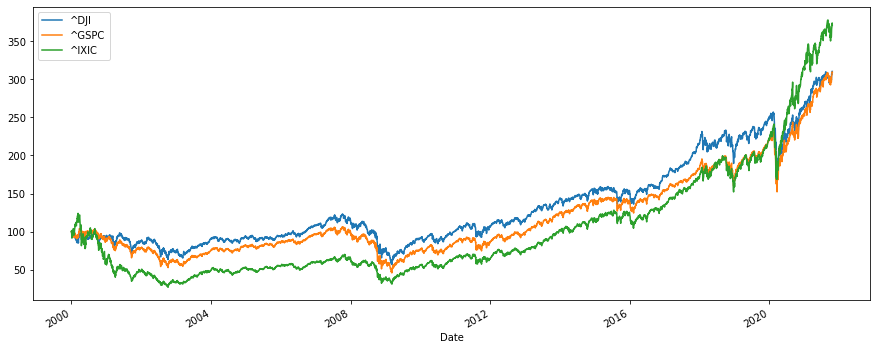

In [5]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()

How would you explain the common and the different parts of the behavior of the three indices?

*****

Obtain the simple returns of the indices.

In [6]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^DJI,^GSPC,^IXIC
Date,,,
2021-10-18,-0.001024,0.003375,0.008355
2021-10-19,0.005635,0.007393,0.007142
2021-10-20,0.004288,0.003664,-0.000490
2021-10-21,-0.000176,0.002996,0.006218
2021-10-22,0.002077,-0.001073,-0.008248


Estimate the average annual return of each index.

In [7]:
annual_ind_returns = ind_returns.mean() * 250 # as 250 days considered anually
annual_ind_returns

^DJI     0.069397
^GSPC    0.070684
^IXIC    0.091125
dtype: float64